# General Machine Learning - Novice Level

Pick **ONE** task and complete it.

**Tasks:**
1. Linear Regression
2. Classification Problem
3. Clustering

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Task 1: Linear Regression

In [28]:
# Load data
df = pd.read_csv('cost_revenue_dirty.csv')
df = df[['USD_Production_Budget', 'USD_Worldwide_Gross']]
def clean_currency(col):
    if df[col].dtype == object:
        df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        # To Convert to numeric, coercing errors to NaN (for '$0' or non-numeric)
        df[col] = pd.to_numeric(df[col], errors='coerce')

clean_currency('USD_Production_Budget')
clean_currency('USD_Worldwide_Gross')

In [29]:
# To remove rows with zero or missing values for either budget or gross revenue
df.dropna(inplace=True)
df = df[df['USD_Production_Budget'] > 0]
df = df[df['USD_Worldwide_Gross'] > 0]


In [30]:
X = df['USD_Production_Budget'].values.reshape(-1, 1)

# Target (y) - Worldwide Gross Revenue
y = df['USD_Worldwide_Gross'].values

# Split data into training and testing sets
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total samples after cleaning: {len(df)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Total samples after cleaning: 5034
Training samples: 4027
Testing samples: 1007



Model Performance on Test Data:
Coefficient of Determination (R-squared): 0.4696
Model Intercept (b): $-9298346.54
Model Coefficient (m, slope): 3.19
Interpretation: For every $1 increase in budget, worldwide gross is predicted to increase by $3.19


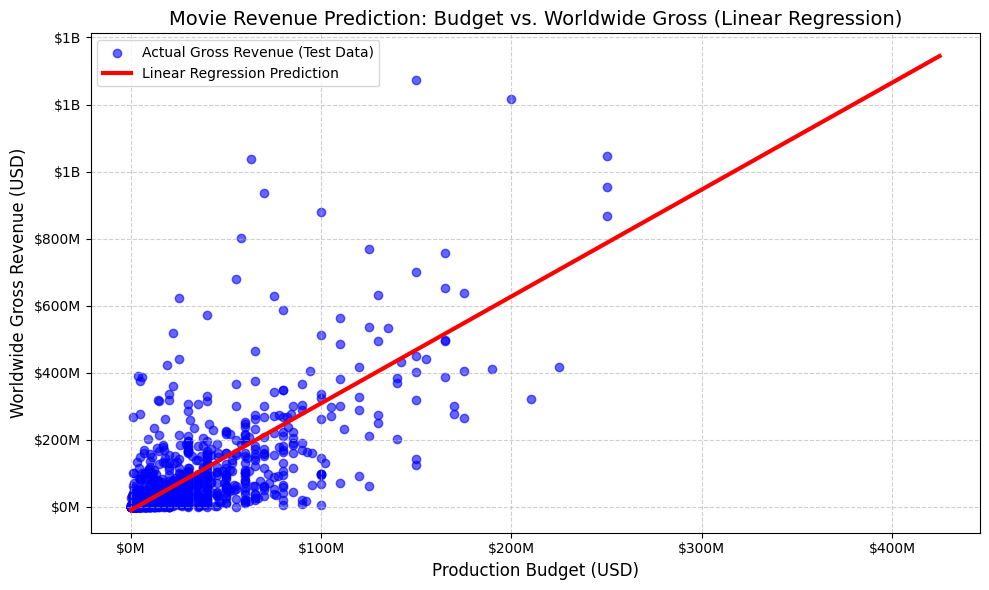

In [31]:
# Visualize results
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = model.score(X_test, y_test)
print(f"\nModel Performance on Test Data:")
print(f"Coefficient of Determination (R-squared): {r_squared:.4f}")
print(f"Model Intercept (b): ${model.intercept_:.2f}")
print(f"Model Coefficient (m, slope): {model.coef_[0]:.2f}")
print("Interpretation: For every $1 increase in budget, worldwide gross is predicted to increase by $%.2f" % model.coef_[0])

# Scatter plot of the data (budget vs. gross)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Gross Revenue (Test Data)', alpha=0.6)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_range_pred = model.predict(X_range)
plt.plot(X_range, Y_range_pred, color='red', linewidth=3, label='Linear Regression Prediction')

plt.title('Movie Revenue Prediction: Budget vs. Worldwide Gross (Linear Regression)', fontsize=14)
plt.xlabel('Production Budget (USD)', fontsize=12)
plt.ylabel('Worldwide Gross Revenue (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='both')

# Format for the axis (in Millions/Billions)
def format_axis(ax):
    """Formats axis ticks to be more human-readable (M/B)."""
    formatter = plt.FuncFormatter(lambda x, p: '${:1.0f}M'.format(x/1000000) if x < 1000000000 else '${:1.0f}B'.format(x/1000000000))
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)

format_axis(plt.gca())
plt.tight_layout()
plt.show()



## Task 2: Classification Problem

In [32]:
# Load dataset

In [33]:
# Try classifier 1

In [34]:
# Try classifier 2

In [35]:
# Compare results

## Task 3: Clustering

In [36]:
# Load data

In [37]:
# Apply K-means

In [38]:
# Visualize clusters

In [39]:
# Find optimal K